# Homework 2: Introduction to Modeling in Python



In [1]:
#Import the basic packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
#turn off warnings for sns depreciated versions
import warnings
warnings.filterwarnings('ignore')


In [2]:
#import the train data from the csv and visualize the first couple of rows
train_df = pd.read_csv(r"C:\Users\zgeorge\Dropbox (CMN Hospitals)\George\School\Fall 2018\Applied Machine Learning\AML_code\Homework 2\Data\train.csv")
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#We should immediately drop the ID column so it doesn't affect any of our models
train_df=train_df.drop('Id',axis=1)
train_df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Create a list that displays only numeric variables
numeric_var=train_df.select_dtypes(include=[np.number]).columns

In [5]:
'Numeric Variables: ',numeric_var

('Numeric Variables: ',
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'))

When we check against the data descriptions provided with the data, we see a couple of variables that are miscategorized:
- MSSubclass
- MoSold (the month it was sold)
So we are going to reassign those as categorical and then check the categorical variables.

In [6]:
train_df[['MSSubClass','MoSold']] = train_df[['MSSubClass','MoSold']].astype('category')
cat_var=train_df.select_dtypes(exclude=[np.number]).columns
'Categorical Variables: ',cat_var

('Categorical Variables: ',
 Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
        'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
        'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
        'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
        'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
       dtype='object'))

In [7]:
train_df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


### Cleaning the Data
#### Checking for skew

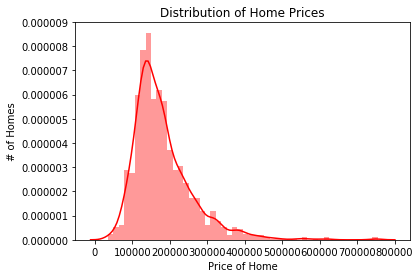

mean :  180921.19589041095
var  :  6306788585.349301
skew :  1.880940746034036
kurt :  6.509812011089439


In [8]:
fig, ax = plt.subplots()
sns.distplot(train_df['SalePrice'],50,color='red')
plt.title('Distribution of Home Prices')
ax.set_xlabel('Price of Home')
ax.set_ylabel('# of Homes')
plt.show()
def showmethedist(x):
    print("mean : ", np.mean(x))
    print("var  : ", np.var(x))
    print("skew : ",skew(x))
    print("kurt : ",kurtosis(x))
showmethedist(train_df['SalePrice'])

We see that it has right skew, so after looking up serveral sites, I found some options:
- square root
- cube root
- log 

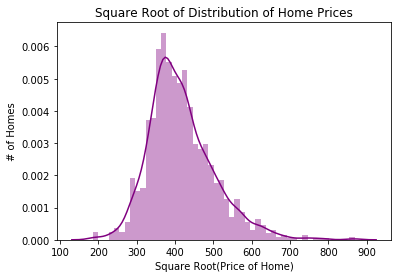

mean :  416.6172247994036
var  :  7351.283890853848
skew :  0.9421834681211159
kurt :  1.9469987212364908


In [9]:
normedprice = np.sqrt(train_df['SalePrice'])
fig, ax = plt.subplots()
sns.distplot(normedprice,50,color='purple')
plt.title('Square Root of Distribution of Home Prices')
ax.set_xlabel('Square Root(Price of Home)')
ax.set_ylabel('# of Homes')
plt.show()

showmethedist(normedprice)

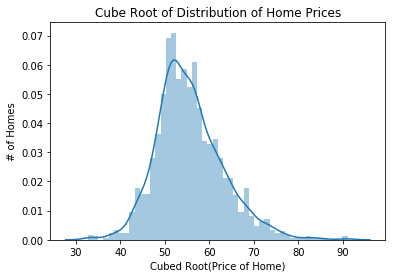

mean :  55.53054173773118
var  :  56.440443367580585
skew :  0.6660824155925081
kurt :  1.2589706508938159


In [10]:
normedprice = np.cbrt(train_df['SalePrice'])
fig, ax = plt.subplots()
sns.distplot(normedprice,50)
plt.title('Cube Root of Distribution of Home Prices')
ax.set_xlabel('Cubed Root(Price of Home)')
ax.set_ylabel('# of Homes')
plt.show()

showmethedist(normedprice)

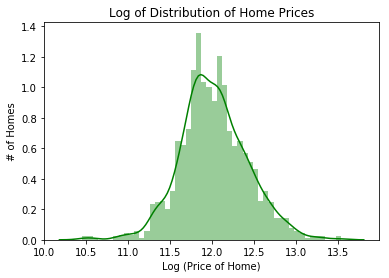

mean :  12.024050901109373
var  :  0.15945250615661058
skew :  0.1212103673013655
kurt :  0.8026555069117713


In [11]:
normedprice = np.log(train_df['SalePrice'])
fig, ax = plt.subplots()
sns.distplot(normedprice,50,color='green')
plt.title('Log of Distribution of Home Prices')
ax.set_xlabel('Log (Price of Home)')
ax.set_ylabel('# of Homes')
plt.show()

showmethedist(normedprice)

In [12]:
#normalize the skewed data
train_df['SalePrice'] = np.log(train_df['SalePrice'])

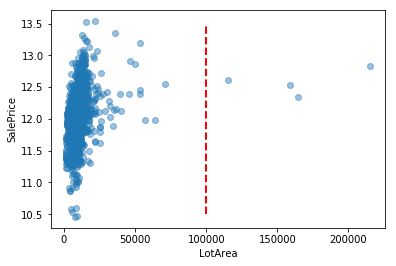

In [13]:
#scatter plot grlivarea/saleprice
sns.regplot('LotArea','SalePrice',train_df,fit_reg=False,scatter_kws={'alpha':0.45})
plt.plot([100000, 100000],[10.5, 13.5],'r--', linewidth=2)

In [14]:
train_df=train_df.query('LotArea <100000') #drop outliers in train

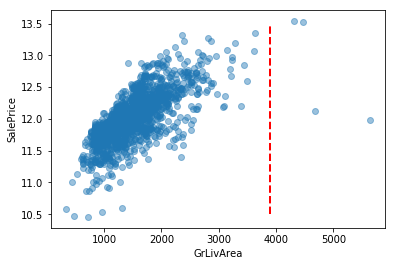

In [15]:
#scatter plot grlivarea/saleprice
sns.regplot('GrLivArea','SalePrice',train_df,fit_reg=False,scatter_kws={'alpha':0.45})
plt.plot([3900, 3900],[10.5, 13.5],'r--', linewidth=2)

In [16]:
train_df=train_df.query('GrLivArea < 3900')

In [17]:
q_df = train_df.quantile([0, 1])
q_df.loc['Lower_Bound'] =  train_df.mean()-3*train_df.std()
q_df.loc['Upper_Bound'] = train_df.mean()+3*train_df.std()
q_df = q_df.T
q_df['check'] = (q_df.iloc[:, 0]<q_df.iloc[:, 2]) | (q_df.iloc[:, 1] > q_df.iloc[:, 3])
q_df[q_df.check != True]

,0.0,1.0,Lower_Bound,Upper_Bound,check
YearRemodAdd,1950.0,2010.0,1922.854979,2046.785517,False
FullBath,0.0,3.0,-0.083254,3.204466,False
GarageCars,0.0,4.0,-0.477646,4.005194,False
YrSold,2006.0,2010.0,2003.825969,2011.809018,False


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

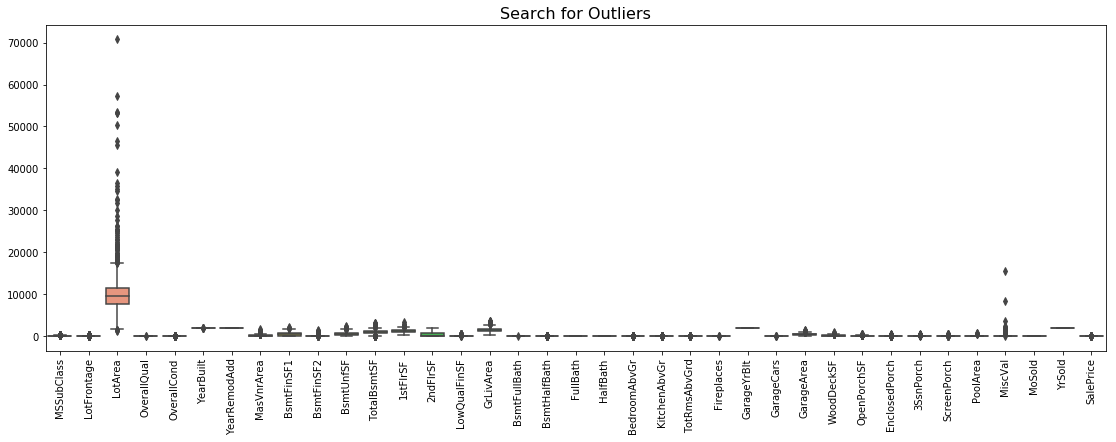

In [18]:
#Create box and whisker plot to see outliers; set plot size and title
plt.figure(figsize=(19,6))
bboxs = sns.boxplot(data=train_df)
plt.title('Search for Outliers',fontsize=16)
plt.xticks(rotation=90)

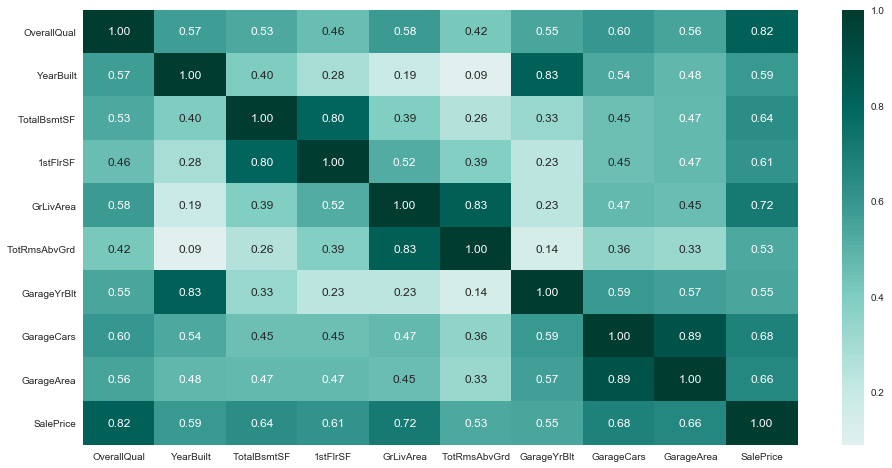

In [19]:
#Check for covariates
correlation=train_df[numeric_var].corr() #obtain the correlation matrix
aux=(abs(correlation)-np.identity(correlation.shape[0])).max() #maximum correlation of each variable
selected_feats=aux[aux>0.69].index#take only variables whose maximum correlation is strong.
sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(correlation.loc[selected_feats,selected_feats], annot=True,fmt='.2f',ax=ax,cmap="BrBG",center=0)

plt.show()

- GarageYrBlt & YearBuilt
- 1stFlrSF & TotalBsmtSF
- TotRmsAbvGrd & GrLivArea
- GarageCars & G

In [20]:
train_df.drop(columns=['GarageArea','1stFlrSF','GarageYrBlt']) #remove columns
numeric_var=numeric_var[numeric_var!='GarageArea'] #remove them from our list too
numeric_var=numeric_var[numeric_var!='1stFlrSF']
numeric_var=numeric_var[numeric_var!='GarageYrBlt']

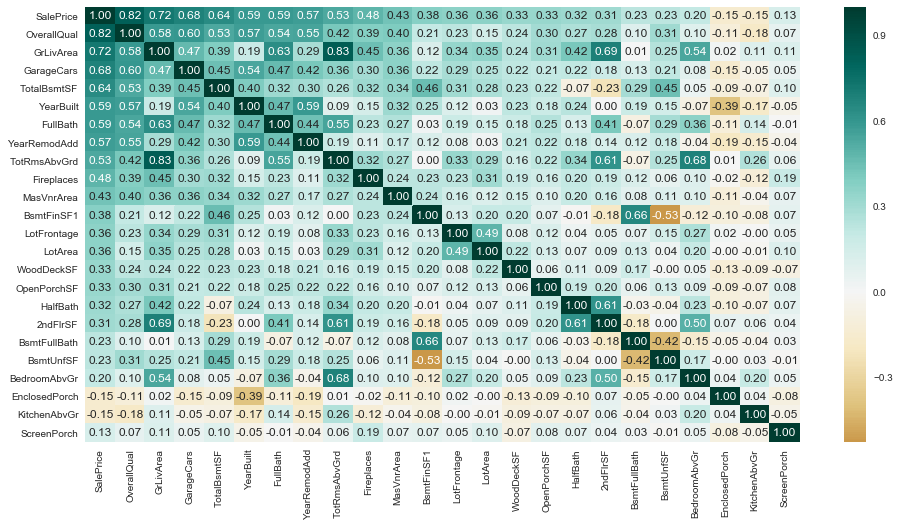

In [21]:
correlation=train_df[numeric_var].corr() #calculate again the correlation matrix (without the removed columns)
aux=abs(correlation['SalePrice']).sort_values(ascending=False) #sort variables by their correlation with SalePrice
selected_feats=aux[0:24].index #Take the best 24.
sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(correlation.loc[selected_feats,selected_feats], annot=True,fmt='.2f',ax=ax,cmap="BrBG",center=0)
plt.show()

In [22]:
#because when categorical data has n/a's in many cases that is just another category. However the numerical should not have n/a's
numeric_train=train_df.select_dtypes(include=[np.number])
nas = numeric_train.isnull().sum().sort_values(ascending=False)
percent = 100*(numeric_train.isnull().sum()/numeric_train.isnull().count()).sort_values(ascending=False)
nasnum_train = pd.concat([nas, percent],axis=1,keys=['NAs','Percent'])
nasnum_train.head(3)

,NAs,Percent
LotFrontage,256,17.630854
GarageYrBlt,81,5.578512
MasVnrArea,8,0.550964


We'll delete anything that has 15% or more missing and then attempt to fill in the rest.

In [23]:
train_df=train_df.drop(['LotFrontage','GarageYrBlt','MasVnrArea'],axis=1)

In [24]:
#because when categorical data has n/a's in many cases that is just another category. However the numerical should not have n/a's
cat_train=train_df.select_dtypes(exclude=[np.number])
nas = cat_train.isnull().sum().sort_values(ascending=False)
percent = 100*(cat_train.isnull().sum()/cat_train.isnull().count()).sort_values(ascending=False)
nascat_train = pd.concat([nas, percent],axis=1,keys=['NAs','Percent'])
nascat_train.head(16)

,NAs,Percent
PoolQC,1447,99.655647
MiscFeature,1400,96.418733
Alley,1361,93.732782
Fence,1172,80.716253
FireplaceQu,690,47.520661
GarageCond,81,5.578512
GarageQual,81,5.578512
GarageFinish,81,5.578512
GarageType,81,5.578512
BsmtFinType2,38,2.617080


In [25]:
train_df=train_df.drop(['MiscFeature','Alley','GarageCond','GarageQual','GarageFinish','GarageType','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType2','MasVnrType'],axis=1)

In [26]:
train_df=train_df[train_df.Electrical!='NA']